In [1]:
import numpy as np
import pandas as pd

In [3]:
# Data Input as Data Frame
data = pd.read_csv("/home/prasun/GitDemo/CRO_IIITL_Test/mushroom/agaricus-lepiota.data")
data.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [5]:
# Primary Exploration
data.shape

(8123, 23)

In [30]:
# Setting aside the target column
y = data.iloc[:,0]


In [34]:
#Treating the labels
y1 = y.apply(lambda x: 1 if x=="e" else 0).values #Labelled poisonous as 0, edible as 1
np.unique(y1)

array([0, 1])

In [35]:
# Setting aside the feature columns
X = data.drop(data.iloc[:,0],axis= "columns")
X.shape

(8123, 21)

In [39]:
# Including Label Encoder
from sklearn.preprocessing import OneHotEncoder
hot = OneHotEncoder()
X1 = hot.fit_transform(X).toarray()

In [44]:
# Splitting Train-Test Dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.2)

In [53]:
# Primary Model Training
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
lreg.fit(X_train,y_train)

LogisticRegression()

<Axes: >

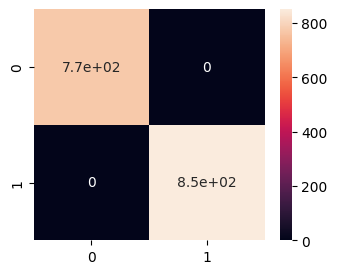

In [71]:
# Visualizing Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import confusion_matrix

y_pred = lreg.predict(X_test)
cm = confusion_matrix(y_pred,y_test)

plt.figure(figsize= (4,3))
sns.heatmap(data=cm, annot= True,square=True)



In [55]:
lreg.score(X_test,y_test)

1.0

In [75]:
#Cross Validation Score
from sklearn.model_selection import cross_val_score
sc = cross_val_score(lreg, X_test,y_test,cv = 10)
print(f"Score: {np.mean(sc)}")

Score: 0.998159509202454
